# make trajectory image

In [ ]:
import os
import pickle
from PIL import Image, ImageDraw
import numpy as np

dataset_root = os.path.abspath("../dataset/RLBench3/train")

for task_name in os.listdir(dataset_root):
    if 'json' in task_name:
        continue
    
    task_dir = os.path.join(dataset_root, task_name)
    for data_index in os.listdir(task_dir):
        print("task:{}  data:{}".format(task_name, data_index))
        data_dir = os.path.join(task_dir, data_index)
        base_data_dir = os.path.join(data_dir, "base_data")
        additional_dir = os.path.join(data_dir, "additional_info")
        os.makedirs(additional_dir, exist_ok=True)
        u_list, v_list = [], []
        pickle_file_list = os.listdir(base_data_dir)
        pickle_file_list.sort()
        for pickle_filename in pickle_file_list:
            with open(os.path.join(base_data_dir, pickle_filename), 'rb') as f:
                pickle_data = pickle.load(f)
                intrinsic_matrix = pickle_data['front_intrinsic_matrix']
                extrinsic_matrix = pickle_data['front_extrinsic_matrix']
                camera2world_matrix = np.linalg.inv(extrinsic_matrix)

                pose = np.append(pickle_data['gripper_pose'][:3], 1)
                pose = np.array(np.dot(camera2world_matrix, pose))
                pose = pose / pose[2]
                uv = np.dot(intrinsic_matrix, pose[:3])
                u_list.append(uv[0])
                v_list.append(uv[1])
        
        for i, pickle_filename in enumerate(pickle_file_list):
            head, ext = os.path.splitext(pickle_filename)
            pos_img = Image.new('L',(256,256))
            d = ImageDraw.Draw(pos_img)
            d.line([(int(u), int(v)) for u, v in zip(u_list[i:],v_list[i:])], fill=(255), width=10) 
            
            img_path = os.path.join(additional_dir, 'goal_trajectory_{}.png'.format(head))
            pos_img.save(img_path)
        

task:PickUpCup  data:00001
task:PickUpCup  data:00002
task:PickUpCup  data:00003
task:PickUpCup  data:00004
task:PickUpCup  data:00005
task:PickUpCup  data:00006
task:PickUpCup  data:00007
task:PickUpCup  data:00008
task:PickUpCup  data:00009
task:PickUpCup  data:00010
task:PickUpCup  data:00011
task:PickUpCup  data:00012
task:PickUpCup  data:00013
task:PickUpCup  data:00014
task:PickUpCup  data:00015
task:PickUpCup  data:00016
task:PickUpCup  data:00017
task:PickUpCup  data:00018
task:PickUpCup  data:00019
task:PickUpCup  data:00020
task:PickUpCup  data:00021
task:PickUpCup  data:00022
task:PickUpCup  data:00023
task:PickUpCup  data:00024
task:PickUpCup  data:00025
task:PickUpCup  data:00026
task:PickUpCup  data:00027
task:PickUpCup  data:00028
task:PickUpCup  data:00029
task:PickUpCup  data:00030
task:PickUpCup  data:00031
task:PickUpCup  data:00032
task:PickUpCup  data:00033
task:PickUpCup  data:00034
task:PickUpCup  data:00035
task:PickUpCup  data:00036
task:PickUpCup  data:00037
t

-------------------------------------------

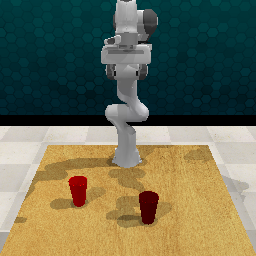

In [3]:
img = Image.open("../dataset/RLBench3/train/PickUpCup/00000/image/front_rgb_00000000.png")
pos_img = Image.new('L',(256,256))
d = ImageDraw.Draw(img)

img

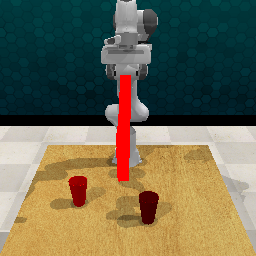

In [7]:
d.line([(int(u), int(v)) for u, v in zip(u_list,v_list)], fill=(255), width=10) 
img

In [7]:
pickle_data.keys()

dict_keys(['front_extrinsic_matrix', 'front_intrinsic_matrix', 'left_shoulder_extrinsic_matrix', 'left_shoulder_intrinsic_matrix', 'right_shoulder_extrinsic_matrix', 'right_shoulder_intrinsic_matrix', 'wrist_extrinsic_matrix', 'wrist_intrinsic_matrix', 'gripper_joint_positions', 'gripper_matrix', 'gripper_open', 'gripper_pose', 'gripper_touch_forces', 'joint_forces', 'joint_positions', 'joint_velocities', 'joints', 'task_low_dim_state'])

In [9]:
pickle_data['gripper_pose'][:3]

array([0.30167332, 0.1817728 , 1.1287353 ])

In [5]:
intrinsic_matrix = pickle_data['front_intrinsic_matrix']
pos_data = np.array(pickle_data['gripper_pose'][:3]) # x,y,z
pos_data = pos_data / pos_data[2] # u,v,1
uv_result = np.dot(intrinsic_matrix, pos_data)

In [6]:
uv_result[:2]

array([ 79.85652931, 137.46738132])